# Exercise 9.2 Faster Method
![formula3](./image/0902_03.png)

In [2]:
from numpy import empty, zeros, max, min, ones, random, array, cosh
from pylab import imshow, gray, show, grid

In [3]:
M = 100 #grid squares on a side
V = 1.0 #voltage at top wall
target = 1e-6

- omegaを0.9前後にするとうまくいくらしいが、overflowがおきてしまう。本にかかれている式から少し改良はしたが、それでもerrorがでる。overflow doble scalar
- （追記）なぜかエラーがでなくなった。不思議。

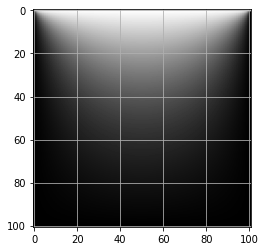

In [4]:
#create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)
omega = 0.9
difference = []

#main loop
delta = 1.0
while delta > target:
    #calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
#                 difference = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]
#                 phiprime[i,j] = phi[i,j] + (1+omega)*difference
                phiprime[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - omega*phiprime[i,j]
    #calculate maximum difference from old values(comparing all points)
    delta = max(abs(phi - phiprime))
    
    #swap the two arrays around
    phi, phiprime = phiprime, phi
    
grid()
imshow(phi)
gray()
show()